# Framingham Heart Study #

### Binary Logistic Regression

In the following analysis, we are going to use the FramingHam Heart Study data set, more information about the data set can be found in the readme file in the GitHub repo.

The aim of this analysis is to fit a binary logistic regression machine learning model that accurately predicts whether or not the patients in the data set will develop a coronary heart disease in the next 10 years, followed by understanding the influence of significant factors that truly affects them. Next, testing the trained model’s generalization (model evaluation) strength on the unseen data set.

### Data and Library Import

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm

In [3]:
# read in the data
framingham_data = pd.read_csv('framingham.csv')

## 1. Exploratory Data Analysis ##

In [4]:
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
len(framingham_data)

4238

In [9]:
# information about the dataset
framingham_data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


## 2. Data Preparation & Cleaning ##

In [57]:
# check for null values in the data
framingham_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

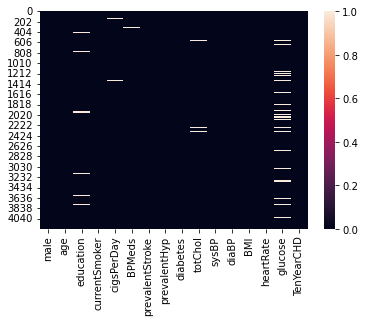

In [58]:
# visualize null values
sns.heatmap(framingham_data.isna())
plt.show()

In [62]:
# remove rows where education = 0
framingham_data = framingham_data.dropna(subset = ['education'])

# fill NaN with mean for missing values
framingham_data['glucose'].fillna(framingham_data['glucose'].mean(), inplace = True)
framingham_data['cigsPerDay'].fillna(framingham_data['cigsPerDay'].mean(), inplace = True)
framingham_data['BPMeds'].fillna(framingham_data['BPMeds'].mean(), inplace = True)
framingham_data['totChol'].fillna(framingham_data['totChol'].mean(), inplace = True)
framingham_data['BMI'].fillna(framingham_data['BMI'].mean(), inplace = True)
framingham_data['heartRate'].fillna(framingham_data['heartRate'].mean(), inplace = True)

# 3. Data Analysis #

### Normalize Coefficients

We are interested in the effects of all the recorded attributes on the probability of developing a coronary heart disease in the next 10 years. We need to normalize the coefficient of one of the alternatives to zero. This will normalize the representative utility to zero. Let's use 1 for people who developed CHD and 0 for those who did not. In terms of our slides, if we normalize coefficents of people that developed CHD, then $V_1=0$. This simplifies the probability to:

$$P_{n1}=\frac{1}{1+e^{-V_{n1}}}$$

Let's define: 
$$V_{n1}=\beta_0+\beta_1\cdot Pclass+\beta_2\cdot Sex+\beta_3\cdot Age$$

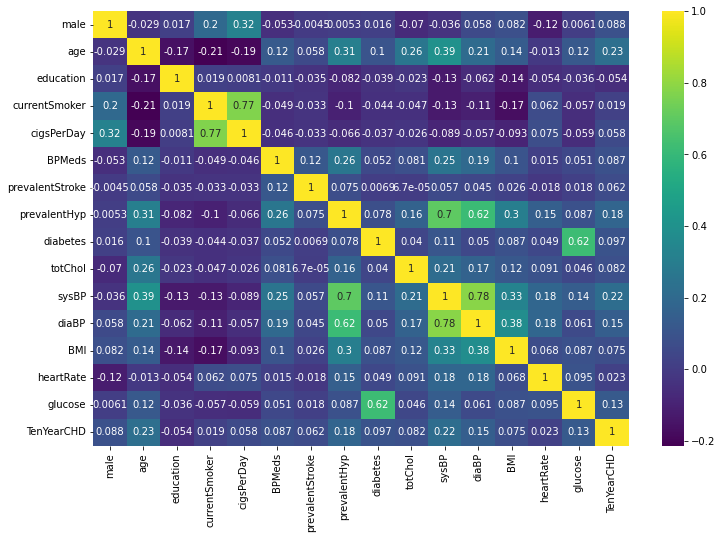

In [7]:
# Heatmap for correlation visualization
plt.figure(figsize=(12,8))
sns.heatmap(framingham_data.corr(),annot=True,cmap='viridis')
plt.show()

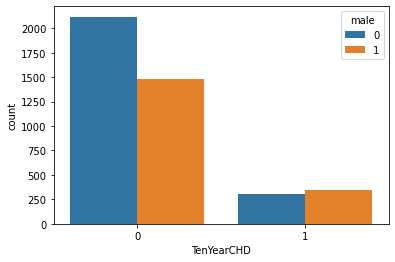

In [13]:
# countplot developing CHD in 10 years by gender
sns.countplot(x = 'TenYearCHD', data=framingham_data, hue='male')
plt.show()

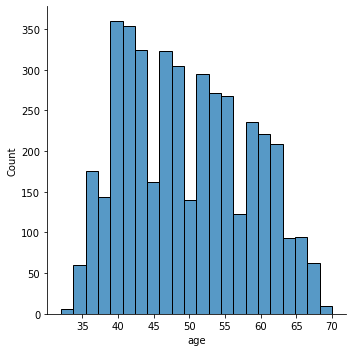

In [20]:
sns.displot(x = 'age', data=framingham_data)
plt.show()

# Data Modelling #

Building Model using Logistic Regression

In [29]:
# Separate Dependent and Independent Variables
x = framingham_data[['male','age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = framingham_data['TenYearCHD']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
# import Logistic Regression package
from sklearn.linear_model import LogisticRegression

In [33]:
# Fit Logistic Regression
lr = LogisticRegression()

In [34]:
lr.fit(x_train, y_train)

/Users/lucieschulz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# predict
prediction = lr.predict(x_test)

# Testing #

In [37]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1190,4
Actual Yes,195,10


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1194
           1       0.71      0.05      0.09       205

    accuracy                           0.86      1399
   macro avg       0.79      0.52      0.51      1399
weighted avg       0.84      0.86      0.80      1399

